### Name : ADITYA SONI
### PID : 246052 
### Date : 02/02/26
### Exp No : 03
### Title : Linear Regression: Parameter Estimation using OLS, MLE, and Gradient Descent

#### OLS

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

x = np.array([1, 2, 3]).reshape(-1, 1)
y = np.array([2, 3, 5])

In [2]:
x = np.array([10, 20, 30, 50]).reshape(-1, 1)
y = np.array([12, 21, 29, 48])

In [3]:
model = LinearRegression()
model.fit(x, y)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [4]:
w = model.coef_[0]
b = model.intercept_

In [5]:
print(f"w(slope) = {w}")
print(f"b(intercept) = {b}")

w(slope) = 0.8971428571428572
b(intercept) = 2.8285714285714256


In [6]:
y_pred = model.predict(x)
print("\nPredictions for training data:")
for xi, yi, ypi in zip(x.flatten(), y, y_pred):
    print(f"X={xi}, Actual Sales={yi}, Predicted Sales={ypi:.2f}")


Predictions for training data:
X=10, Actual Sales=12, Predicted Sales=11.80
X=20, Actual Sales=21, Predicted Sales=20.77
X=30, Actual Sales=29, Predicted Sales=29.74
X=50, Actual Sales=48, Predicted Sales=47.69


In [7]:
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"\nMean Squared Error (MSE) = {mse:.4f}")
print(f"R^2 Score = {r2:.4f}")


Mean Squared Error (MSE) = 0.1857
R^2 Score = 0.9989


### MLE

In [13]:
from scipy.optimize import minimize

In [21]:
# Data
x = np.array([1,2,3])
y = np.array([2,3,5])

In [30]:
#Step 3 : Negative log likelihood function
def neg_log_likelihood(params):
    w,b = params
    sigma2 = 1
    y_pred = w*x +b
    nll = 0.5*np.sum((y-y_pred)**2 / sigma2) 
    return nll

In [31]:
# Initial guess for w,b
initial_guess = [0,0]

In [32]:
# Minimize negative log likelihood
result = minimize(neg_log_likelihood,initial_guess)
w_mle , b_mle = result.x
print(f"MLE w = {w_mle}")
print(f"MLE b = {b_mle}")

MLE w = 1.5000000041067203
MLE b = 0.33333339169014964


In [35]:
y_pred = w_mle* x +  b_mle
print("\nPredictions for training data:")
for xi, yi, ypi in zip(x.flatten(), y, y_pred):
    print(f"X={xi}, Actual Sales={yi}, Predicted Sales={ypi:.2f}")


Predictions for training data:
X=1, Actual Sales=2, Predicted Sales=1.83
X=2, Actual Sales=3, Predicted Sales=3.33
X=3, Actual Sales=5, Predicted Sales=4.83


In [36]:
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"\nMean Squared Error (MSE) = {mse:.4f}")
print(f"R^2 Score = {r2:.4f}")


Mean Squared Error (MSE) = 0.0556
R^2 Score = 0.9643


### Gradient Descent

In [48]:
w,b = 0,0
alpha = 0.0001
n_iter = 1000
n = len(x)

for i in range(n_iter):
    y_pred = w*x.flatten()+b
    dw = (-2/n)*np.sum(x.flatten()*(y-y_pred))
    db = (-2/n)*np.sum(y-y_pred)
    w -= alpha * dw
    b -= alpha * db

print("slope(w) :",w)
print("intercept(b) :",b)

slope(w) : 0.9277932204091286
intercept(b) : 0.4003820339618283


In [49]:
y_pred = w * x + b
print("\nPredictions for training data:")
for xi, yi, ypi in zip(x.flatten(), y, y_pred):
    print(f"X={xi}, Actual Sales={yi}, Predicted Sales={ypi:.2f}")


Predictions for training data:
X=1, Actual Sales=2, Predicted Sales=1.33
X=2, Actual Sales=3, Predicted Sales=2.26
X=3, Actual Sales=5, Predicted Sales=3.18


In [50]:
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"\nMean Squared Error (MSE) = {mse:.4f}")
print(f"R^2 Score = {r2:.4f}")


Mean Squared Error (MSE) = 1.4346
R^2 Score = 0.0778


### GD WITH SINGLE PARAMETERS

In [64]:
!python3 -m pip install matplotlib


[notice] A new release of pip is available: 25.3 -> 26.0
[notice] To update, run: pip3 install --upgrade pip


In [65]:
import matplotlib.pyplot as plt

In [66]:
x = np.array([1,2,3])
y = np.array([2,3,5])

n = len(x)

def loss(w1):
    w0 = np.mean(y) - w1 * np.mean(x)
    y_pred = w1 * x + w0
    return np.sum((y-y_pred)**2)

def gradient(w2):
    w0 = np.mean(y) - w1 * np.mean(x)
    y_pred = w1 * x + w0
    return -2 * np.sum(x*(y-y_pred))

In [67]:
lr = 0.1
w1 = 4
iterations = 15

w1_values = []
loss_values = []

for i in range(iterations):
    w1_values.append(w1)
    loss_values.append(loss(w1))
    grad = gradient(w1)
    w1 = w1 - lr * grad

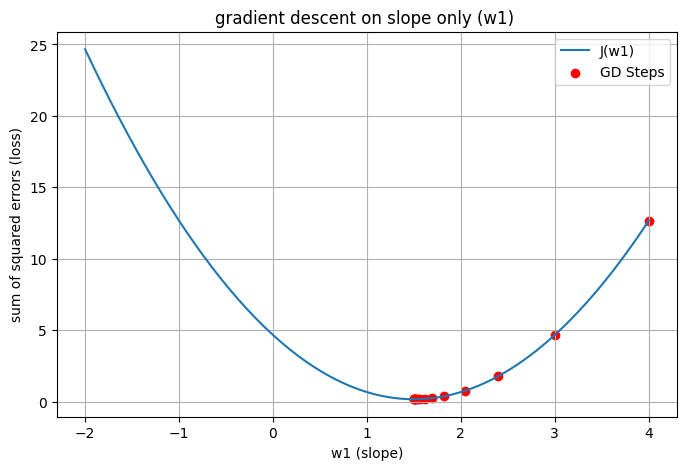

In [63]:
w_space = np.linspace(-2,4,200)
loss_space = [loss(w) for w in w_space]

plt.figure(figsize = (8,5))
plt.plot(w_space , loss_space , label = "J(w1)")
plt.scatter(w1_values,loss_values,color = "red" , label = "GD Steps")
plt.xlabel("w1 (slope)")
plt.ylabel("sum of squared errors (loss)")
plt.title("gradient descent on slope only (w1) ")
plt.legend()
plt.grid(True)
plt.show()